
# Introduction: Predicting The Next Word In A Sentence

In this project, we will be working on a text dataset, a book written by Plato, “The Republic.” This project will preprocess the data into a more usable format. Will train and develop an algorithm model using the sequence-based datasets. We will be using Deep Learning (Long Short-term Memory) LSTM model to develop our algorithm model. This model is based on Neural Net-Architecture and provides very high performance on sequence-based datasets. It has a feedback structure helping the model remember the sequence of data input and the changes in the output depending on what is happening to predicit the next word in a setence.

In [2]:
import string
#Provides a set of diverse algorithms for an LP and for Computational Linguistics.
import nltk
import re
import string
from nltk.corpus import stopwords
import pkg_resources
import pickle
import nltk
import re, string, json
from tqdm.notebook import tqdm
from nltk.tokenize import word_tokenize

In [3]:
from numpy import array
from pickle import dump
from keras.preprocessing.text import Tokenizer
#keras's library function that is embedded into the TensorFlow Library
#TensorFlow provides both high level and low level APIs for working with deep learning models
#Using packages required to handle string data. 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

### Token_Word Funciton:

We develope the tokenize_word function. The first thing is to understand the tokenization process. The process of breaking down the text dataset and building each word in the set into individual tokens and this is known as tokenization. We are using the tokenize_word function.  In machine learning and deep learning architectures, we cannot send or input strings data types into the models. We convert the string data into a number data type. Then the first process is tokenization. We can perform computation takes on actual numbers or a list of numbers.  This is called word vectorization or words embeddings.

Example: “I am going today”  converts into using tokenization to convert to list [“I’, “am”, “going”, “today”] dataset. Then data is into vectors representing our word dataset. We are creating numerical data from text data that comes from our dataset. 


In [ ]:
def tokenize_word(sentences):
    """
    Tokenize sentences into tokens (words)
    
    Args:
        sentences: List of strings
    
    Returns:
        List of lists of tokens
    """
    print("Starting Cleaning Process")
    tokenized_sentences = []
    for sentence in tqdm(sentences):
        
        # Convert to lowercase letters
        sentence = cleanhtml(sentence)
        sentence = _replace_urls(sentence)
        sentence = remove_email(sentence)
        #Anything that is not a lower or upper case word remove from our sentence repalce with a empty string
        sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)
        sentence = sentence.lower()
        sentence = misc(sentence)
        

        # tokenized = nltk.word_tokenize(sentence)
        
        # append the list of words to the list of lists
        # tokenized_sentences.append(tokenized)
        tokenized_sentences.append(sentence)
    
    return tokenized_sentences

#We use particular functions below to clean the string list.
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

#Function replaces and removes URLS from the dataset.
def _replace_urls(data):
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)
    return data

#Function removes emails 
def remove_email(data):
    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)
    return data

#Function removes other random data not needed
def misc(data):
    # Remove new line characters
    data = re.sub('\s+', ' ', data)
    # Remove distracting single quotes
    data = re.sub("\'", "", data)
    data = re.sub("ww+", "", data)
    # Removing roman-case:
    MAYBE_ROMAN = re.compile(r'(\b[MDCLXVI]+\b)(\.)?', re.I)
    data = re.sub(MAYBE_ROMAN, "", data)
    return data

In [ ]:
#This function is looking for sentences that the number of tokens are less than 5 remove then sentence. 
#Sentences with less than 5 tokens are to short for our LSTM model to be useful.
def littleCleaning(sentences):
    print("Starting cleaning Process")
    ret_list = []
    for sentence in sentences:
        words = sentence.split(" ")
        if len(words) > 5:
            ret_list.append(sentence)
        else:
            continue
    return ret_list

In [4]:
#Download the Natural Language Processing with Python package that is needed
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC-8783213\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC-8783213\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
path = 'Dataset/republic.txt'
text = open(path).read().lower()
print('length of the corpus is: :', len(text))

length of the corpus is: : 1174387


In [ ]:
# Converting the data into lists.
# Creating sentences into strings using the split fuction

data_list = text.split(".")
data_list[:20]

['the project gutenberg ebook of the republic, by plato\n\nthis ebook is for the use of anyone anywhere in the united states and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever',
 ' you may copy it, give it away or re-use it under the terms\nof the project gutenberg license included with this ebook or online at\nwww',
 'gutenberg',
 'org',
 ' if you are not located in the united states, you\nwill have to check the laws of the country where you are located before\nusing this ebook',
 '\n\ntitle: the republic\n\nauthor: plato\n\ntranslator: b',
 ' jowett\n\nrelease date: october, 1998 [ebook #1497]\n[most recently updated: september 11, 2021]\n\nlanguage: english\n\n\nproduced by: sue asscher and david widger\n\n*** start of the project gutenberg ebook the republic ***\n\n\n\n\nthe republic\n\nby plato\n\ntranslated by benjamin jowett\n\nnote: see also “the republic” by plato, jowett, ebook #150\n\n\ncontents\n\n introduction and analysis',
 '\n the 

In [ ]:
pro_sentences = []
# Function to clean up data
def normalization_pipeline(sentences):
    print("Starting Normalization Process")
    sentences = tokenize_word(sentences)
    sentences = littleCleaning(sentences)
    print("Normalization Process Finished")
    return sentences

pro_sentences = normalization_pipeline(data_list)
pro_sentences[: 5]

Starting Normalization Process
Starting Cleaning Process


  0%|          | 0/7012 [00:00<?, ?it/s]

Starting cleaning Process
Normalization Process Finished


['the project gutenberg ebook of the republic by plato this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever',
 ' you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at ',
 ' if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook',
 ' title the republic author plato translator b',
 ' jowett release date october ebook most recently updated september language english produced by sue asscher and david widger start of the project gutenberg ebook the republic the republic by plato translated by benjamin jowett note see also the republic by plato jowett ebook contents introduction and analysis']

In [ ]:
#After the clean up procress we have 6,309 sentences compaired to 7,012 setences before the cleaning process
len(pro_sentences)

6309

#### Note: 

Only using 700 sentences out of 6,309 sentences after the cleaning process. Only 700 sentences were used because the computer power needed to analyze for sentences did not improve the model and took up to much computer resources. 700 sentences of data are enough to train the model.


In [ ]:
# Structuring th etext into a paragraph:
# We are only using 700 sentences out of 6,309 sentences. 
dataText = "".join(pro_sentences[: 700])
dataText[: 200]

'the project gutenberg ebook of the republic by plato this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions what'

In [ ]:
# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

In [ ]:
# clean document
tokens = clean_doc(dataText)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'republic', 'by', 'plato', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', 'title', 'the', 'republic', 'author', 'plato', 'translator', 'b', 'jowett', 'release', 'date', 'october', 'ebook', 'most', 'recently', 'updated', 'september', 'language', 'english', 'produced', 'by', 'sue', 'asscher', 'and', 'david', 'widger', 'start', 

### Define Input and Output:

Here we create a for loop that we organize our sequence of tokens to create our input of data and create an independent variable. The length of the sequences of tokens is 51 words.  The first 50 words will be used as input (the sample size) for the model, and the 51st word will be used to create an independent variable that would be used for predicting the word in our model. We will predict by making X= 50 words as input and Y= 1(51) word as the independent variable for the model. 

#### X= List[50 words] -> Sample Input

#### Y=List[1 word] -> This is the Predicting word for our model


In [ ]:
# organize into sequences of tokens to create our input data
#Creating a list that has 51 words
#the words will be input and the 51 word will be the independent variable
#The 51 word will be the word we use to predict
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 21684


In [ ]:
# save sequences to file

# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
    
out_filename = 'Dataset/republic_sequences.txt'
save_doc(sequences, out_filename)

In [ ]:
# load
in_filename = 'Dataset/republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
# Transforming my regular texts into numberical ones like the list of vectors
sequences = tokenizer.texts_to_sequences(lines)
# vocabulary size meaning the number of unqunie words
vocab_size = len(tokenizer.word_index) + 1

# Separate into input and output
# Convert the sequences into a array to bulid our X and Y variables
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

### Define Model:

Here is the code section where we define and train our model. First, we start by defining our model and see how it does on the dataset we have. We are using LSTM because it has feedback connection and connection architecture that helps to understand the entire sequence of data to remember the entire sequence data and helps improve the model's accuracy and predictive power.  For the datasets with many sequences, LSTM models are good at processing the data sequence. The LSTM helps the model understand the output layer and what is going on in the first layer. 

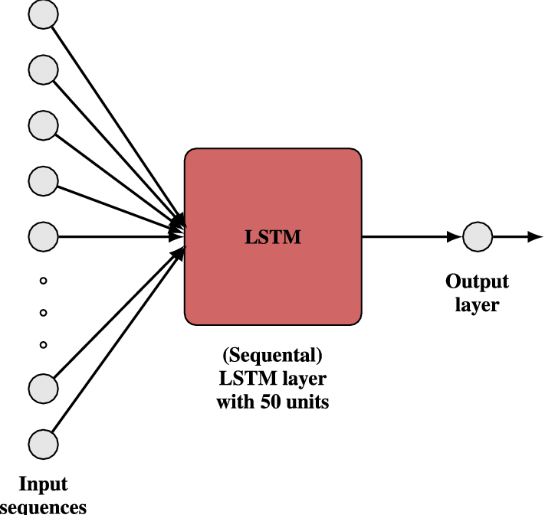

In [ ]:
# define model
model = Sequential()
#Embedding the model use vocab_size is to create vector and vector for each word
model.add(Embedding(vocab_size, 50, input_length=seq_length))
#Using the LSTM function with input to 50 tokens or words
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
#In our model, we are classified by taking the input variable and classifying unique words used for the prediction 
#of our model. Then we use the words to make the prediction. 
#Dense model understanding our input for the 50 words
model.add(Dense(50, activation='relu'))
#Desse model to understand the vocab_size and use the activation function softmax which is used for classification
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
batch_size=128
epochs=50
model.fit(X, y, batch_size=batch_size, epochs=epochs)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            177450    
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 3549)              180999    
                                                                 
Total params: 401,399
Trainable params: 401,399
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
170/170 [=======================

### First Observation:

After testing our model, For the 50 words are tokens, our accuracy only reached  27.11 percent at the 50 callbacks. That is not much but the results, but also it is not a large cycle. There are two reasons for our accuracy; however, as we can see, the model's accuracy increases as the callbacks increase. As the callbacks increase, the accuracy of the model also increases. Also, we can see the loss is also decreasing as the callbacks increase. We would have gotten better accuracy if we were to do more callbacks and our training size sample. 
 
### Second Observation:

I took the data from the center first. I only wrote 700 sentences versus the 6000 sentences. If we were to use more data or model would also improve; however, there's also a limitation due to the Computer Resources I had.  However, I am not sure if the increase in that sentence size dramatically makes a difference in the accuracy of our model. However, the acceptable precision depends on many factors, and for this project, an accuracy of about 27% is acceptable.



In [ ]:
# save the model to file
model.save("Dataset/DataScienceModels/nexWordPredict/nextWord.h5")
# save the tokenizer
dump(tokenizer, open('Dataset/DataScienceModels/tokenizer.pkl', 'wb'))

In [ ]:
# generate a sequence from a language model to test our model
import numpy as np

def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        #padding function for to make word size
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        # yhat = model.predict_classes(encoded, verbose=0)
        predict_x=model.predict(encoded) 
        yhat=np.argmax(predict_x,axis=1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [ ]:
# load cleaned text sequences
in_filename = 'Dataset/republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

print(len(lines))
print(lines[0])

21684
the project gutenberg ebook of the republic by plato this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the


In [ ]:
# load the model
model = load_model("Dataset/DataScienceModels/nexWordPredict/nextWord.h5")

# load the tokenizer
tokenizer = load(open('Dataset/DataScienceModels/tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 12)
print(generated)

after ages which few great writers have ever been able to anticipate for themselves they do not perceive the want of connexion in their own writings or the gaps in their systems which are visible enough to those who come after them in the beginnings of literature and philosophy amid the

best of good the republic is not not to be the embodiment


### Input:

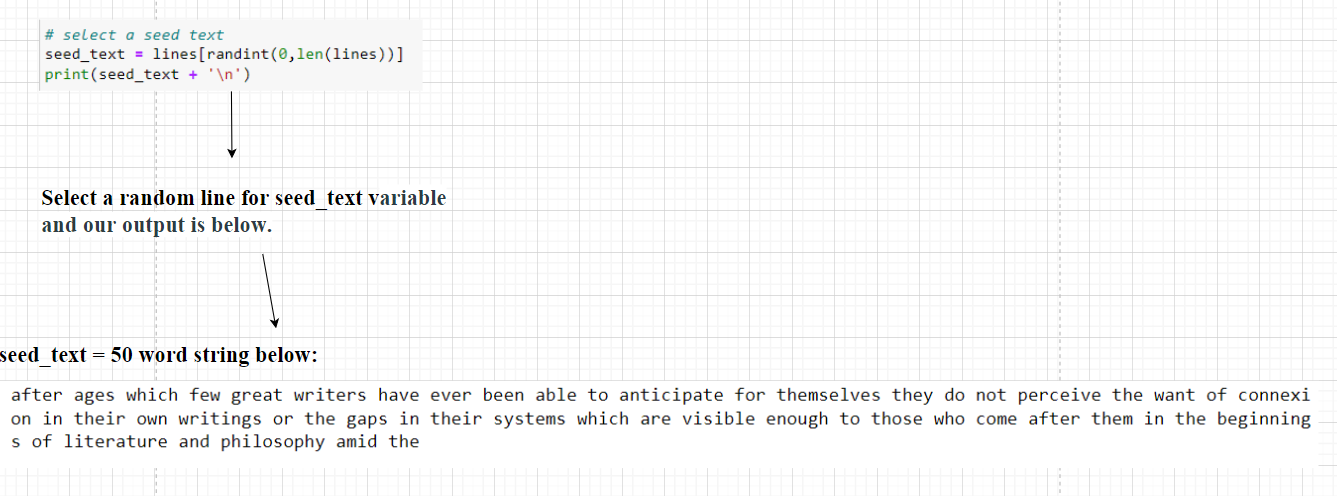

We load the model file and the tokenizer file that were developed in our analysis.  We get a random sentence from our file and we assign it to the seed_text variable.  We can see in the diagram.  We have a sentence of 50 words for the model to analyze. 

### Output:

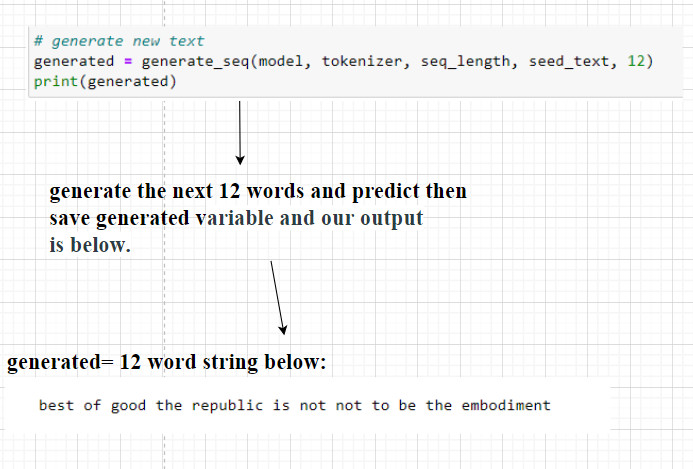

As the predicted output from the generated variable, in the text sample above. However, we notice that our predicted output repeats the word “not” twice. Although out model predicts word based on the model we develop, we also have to consider that our current model is only about 27 percent accurate—the fact seems to fit what output we got in the diagram above. Keep in mind that we only used 50 callbacks when training the model. As the callbacks in our training dataset increase, the model's accuracy also increases, and we can also see that the loss is also decreasing as the callbacks increase in the training sample. If we were to do more callbacks and our training size sample, we would have gotten better accuracy.

